<div style="direction:rtl; text-align:right; font-size: 25px">
    تجزیه و تحلیل ترکیب اصلی (PCA)
</div>


<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    نرخ تبدیل دلار/ یورو:
</div>


In [1]:
import yfinance as yf
symbol = 'EURUSD=X'
start_date = '2010-01-01'
end_date = '2023-01-01'
dollar_euro_data = yf.download(symbol, start=start_date, end=end_date)
dollar_euro_data.to_csv('dollar_euro.csv')
dollar_euro_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0
...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,1.066780,0
2022-12-27,1.064022,1.066900,1.061244,1.064022,1.064022,0
2022-12-28,1.063717,1.067430,1.061391,1.063717,1.063717,0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA:
</div>

<div style="direction:rtl; text-align:right; font-size: 17px; color:black">
    برای آماده‌سازی داده، ابتدا index دیتافریم را با تاریخ‌ تنظیم می‌کنیم. سپس داده‌های null را با استفاده از bfill و سپس برای داده‌هایی که پر نشده‌اند از ffill استفاده می‌کنیم. و در آخر با استفاده از standardscaler داده‌ها را نرمال سازی می‌کنیم. 
</div>

In [2]:
import pandas as pd
dollar_euro_data = pd.read_csv('dollar_euro.csv')
dollar_euro_data['Date'] = pd.to_datetime(dollar_euro_data['Date'])
dollar_euro_data.set_index('Date', inplace=True)

In [3]:
null_counts1 = dollar_euro_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
dollar_euro_data_bfill = dollar_euro_data.bfill()
dollar_euro_data_ffill = dollar_euro_data_bfill.ffill()
dollar_euro_data = dollar_euro_data_ffill

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dollar_euro_data)
scaled_dollar_euro_data = scaler.transform(dollar_euro_data)
scaled_dollar_euro_data = pd.DataFrame(scaled_dollar_euro_data,
columns = dollar_euro_data.columns, index = dollar_euro_data.index)

In [6]:
scaled_dollar_euro_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,1.988600,2.009043,2.034404,2.045339,2.045339,0.0
2010-01-04,1.973617,2.052840,1.977008,2.075327,2.075327,0.0
2010-01-05,2.076683,2.080184,2.056380,2.024214,2.024214,0.0
2010-01-06,2.022850,2.037660,2.002754,2.057756,2.057756,0.0
2010-01-07,2.055460,2.046618,2.012323,1.981992,1.981992,0.0
...,...,...,...,...,...,...
2022-12-26,-1.233227,-1.291817,-1.249832,-1.233712,-1.233712,0.0
2022-12-27,-1.257512,-1.263907,-1.246749,-1.258011,-1.258011,0.0
2022-12-28,-1.260202,-1.259263,-1.245455,-1.260703,-1.260703,0.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

<div style="direction:rtl; text-align:right; font-size: 15px; color:black">
     اجزای اصلی (Principal Components) در متحرک‌ها (متغیرها) از الگوریتم PCA بدست می‌آیند و ترکیب خطی از متغیرهای اصلی نشان‌دهنده نقاط جدید در فضای ویژگی است. به عبارت دیگر، ترکیب خطی از متغیرهای اصلی به ما اجازه می‌دهد که داده‌های اصلی را به نقاط جدید در فضای کم‌بعدتری تبدیل کنیم. </br>
     مولفه‌های اصلی ترکیب خطی حداکثر مقدار واریانس داده‌ها را ثبت می‌کنند.ترکیب خطی نقطه‌های جدیدی را در فضای کم‌بعدتر نسبت به فضای اولیه تولید می‌کند. این کاهش بعد داده‌ها می‌تواند در کاربردهای مختلف مانند داده‌کاوی، تشخیص الگو، تصویربرداری، کاهش ابعاد تصاویر و سیگنال‌ها و بسیاری دیگر از مسائل مفید واقع شود. 
</div>

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_dollar_euro_data)

PCA(n_components=6)

In [8]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_dollar_euro_data.columns)

In [9]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.447433,0.224004,-0.204755,-0.841250,-0.000000e+00,0.0
High,0.447333,0.214362,0.864160,0.084670,-3.081536e-15,0.0
Low,0.446412,-0.894778,-0.009269,0.001431,1.521684e-16,0.0
Close,0.447444,0.227204,-0.324974,0.377576,7.071068e-01,0.0
Adj Close,0.447444,0.227204,-0.324974,0.377576,-7.071068e-01,0.0
Volume,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,1.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

<div style="direction:rtl; text-align:right; font-size: 15px; color:black">
      واریانس، میزان پراکندگی داده‌ها حول میانگین را نشان می‌دهد و توزیع واریانس نشان‌دهندهٔ اهمیت هر کامپوننت یا ویژگی است.</br>
      هنگامی که داده‌ها را با استفاده از PCA تحلیل می‌کنیم، این تابع واریانس مرتبط با هر کامپوننت جدید را محاسبه می‌کند. این واریانس نشان‌دهندهٔ میزان اطلاعاتی است که توسط هر کامپوننت جدید اضافه می‌شود و در نتیجه توانایی توصیف داده‌ها بهتر است.</br>
      برای مشاهده‌ی توزیع واریانس از متود explained_variance_ratio_ استفاده می‌کنیم.</br>
</div>

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
        در اینجا توضیحاتی کلی برای نمودار مشابه برای هشت داده آورده می‌شود:</br>
      این نمودار نشان می‌دهد که هر کامپوننت چقدر از توزیع واریانس را به خود اختصاص داده است. با انتخاب هر کامپوننت روی محور افقی و پیدا کردن مقدار آن روی محور قایم میتوان این مقدار را به دست آورد.
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


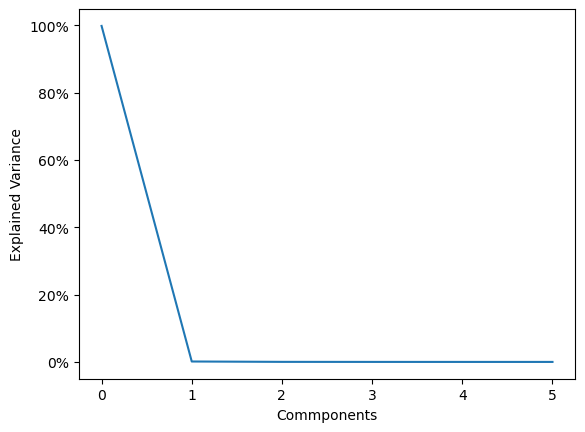

In [10]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     طبق این نمودار می‌توان مشاهده کرد که با اضافه شدن کامپوننت جدید بعد از کامپوننت شماره‌ی صفر اطلاعات جدیدی به دست نمی‌آید چرا که توزیع واریانس بعد از آن به صفر می‌رسد.
</div>

[4.99409088e+00+0.j 6.31157877e-03+0.j 8.71531310e-04+0.j
 2.03110635e-04+0.j 6.01853108e-36+0.j 0.00000000e+00+0.j]
[[-4.47432995e-01 -2.24003507e-01 -2.04754877e-01  8.41250013e-01
  -6.49100693e-17  0.00000000e+00]
 [-4.47333334e-01 -2.14362260e-01  8.64160118e-01 -8.46699459e-02
   3.71859694e-17  0.00000000e+00]
 [-4.46412301e-01  8.94778242e-01 -9.26864040e-03 -1.43111781e-03
  -3.62994316e-18  0.00000000e+00]
 [-4.47444221e-01 -2.27203816e-01 -3.24974478e-01 -3.77576064e-01
  -7.07106781e-01  0.00000000e+00]
 [-4.47444221e-01 -2.27203816e-01 -3.24974478e-01 -3.77576064e-01
   7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


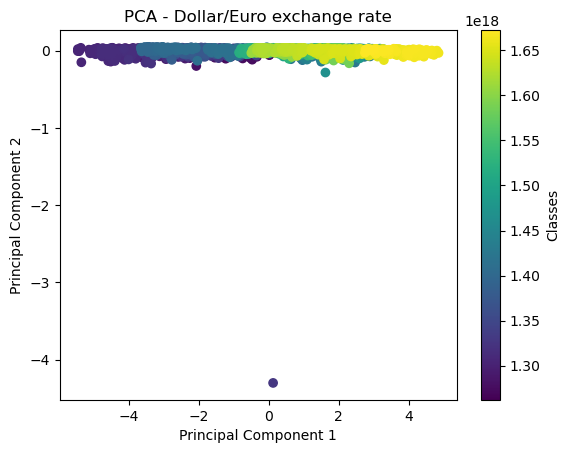

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_dollar_euro_data.values
y = scaled_dollar_euro_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dollar/Euro exchange rate')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     براساس نمودار مشاهده می‌کنیم که مولفه‌ی اصلی اول بیشترین واریانس داده‌ها را در بر می‌گیرد، این درحالیست که با توجه به نمودار بالا می‌توان فهمید که مولفه‌ی دوم چنین نیست. پس داده‌ها به صورت خطی می‌توانند شبیه‌سازی شوند.
</div>

<div style="direction:rtl; text-align:right; font-size: 15px; color:black">
     در ادامه روشی دیگری برای نمایش دادن این نمودار و استفاده از pca نشان داده شده است. اما با توجه به اینکه راه حل استفاده شده توسط استاد، روش قبلی بود. در ادامه‌ی تحلیل داده نیز از همان روش استفاده می‌کنیم.
</div>

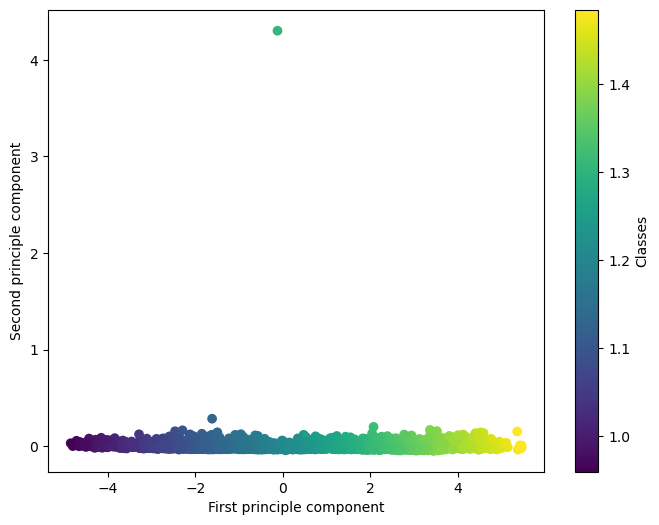

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dollar_euro_data)
scaled_dollar_euro_data = scaler.transform(dollar_euro_data)
scaled_dollar_euro_data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_dollar_euro_data)
x_pca = pca.transform(scaled_dollar_euro_data)
scaled_dollar_euro_data.shape
x_pca.shape
x_pca
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = dollar_euro_data['Close'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.colorbar(label='Classes')

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    نرخ تبدیل دلار/ ریال سعودی:
</div>


In [13]:
import yfinance as yf
symbol = 'SAR=X'
start_date = '2010-01-01'
end_date = '2023-01-01'
dollar_rial_data = yf.download(symbol, start=start_date, end=end_date)
dollar_rial_data.to_csv('dollar_rial.csv')
dollar_rial_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,3.750300,3.750400,3.691600,3.692300,3.692300,0
2010-01-05,3.749100,3.750700,3.741700,3.750700,3.750700,0
2010-01-06,3.702900,3.758000,3.702900,3.750100,3.750100,0
2010-01-07,3.739300,3.752700,3.739300,3.749600,3.749600,0
2010-01-08,3.749800,3.751200,3.742600,3.749800,3.749800,0
...,...,...,...,...,...,...
2022-12-26,3.757900,3.758000,3.736300,3.757900,3.757900,0
2022-12-27,3.758400,3.760500,3.750503,3.758400,3.758400,0
2022-12-28,3.754082,3.755476,3.753732,3.754082,3.754082,0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [14]:
import pandas as pd
dollar_rial_data = pd.read_csv('dollar_rial.csv')
dollar_rial_data['Date'] = pd.to_datetime(dollar_rial_data['Date'])
dollar_rial_data.set_index('Date', inplace=True)

In [15]:
null_counts1 = dollar_rial_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [16]:
dollar_rial_data_bfill = dollar_rial_data.bfill()
dollar_rial_data_ffill = dollar_rial_data_bfill.ffill()
dollar_rial_data = dollar_rial_data_ffill

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dollar_rial_data)
scaled_dollar_rial_data = scaler.transform(dollar_rial_data)
scaled_dollar_rial_data = pd.DataFrame(scaled_dollar_rial_data,
columns = dollar_rial_data.columns, index = dollar_rial_data.index)

In [18]:
scaled_dollar_rial_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.159809,-0.123937,-3.400605,-6.235368,-6.235368,0.0
2010-01-05,0.083240,-0.101931,-0.137956,0.346871,0.346871,0.0
2010-01-06,-2.864751,0.433660,-2.664726,0.279233,0.279233,0.0
2010-01-07,-0.542088,0.044815,-0.294246,0.222883,0.222883,0.0
2010-01-08,0.127906,-0.065249,-0.079344,0.245428,0.245428,0.0
...,...,...,...,...,...,...
2022-12-26,0.644764,0.433660,-0.489616,1.158381,1.158381,0.0
2022-12-27,0.676666,0.617088,0.435329,1.214732,1.214732,0.0
2022-12-28,0.401138,0.248482,0.645605,0.728051,0.728051,0.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_dollar_rial_data)

PCA(n_components=6)

In [20]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_dollar_rial_data.columns)

In [21]:
loading

,P0,P1,P2,P3,P4,P5
Open,-0.421635,0.518374,-0.000277,-0.743984,1.013927e-16,0.0
High,-0.164414,0.763129,-0.010402,0.624895,8.711256e-17,0.0
Low,-0.481227,-0.215669,-0.840735,0.122769,2.641953e-17,0.0
Close,-0.530854,-0.226285,0.382790,0.143042,7.071068e-01,0.0
Adj Close,-0.530854,-0.226285,0.382790,0.143042,-7.071068e-01,0.0
Volume,0.000000,-0.000000,-0.000000,-0.000000,0.000000e+00,1.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


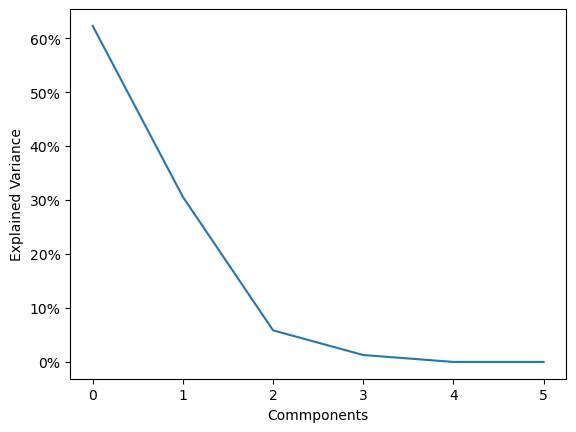

In [22]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     در این نمودار همانند تحلیل در نمودار قبل می‌توان فهمید که با اضافه شدن کامپوننت جدید چقدر از توزیع واریانس داده‌ها به آن اختصاص می‌یابد. در اینجا حدود ۶۰ درصد از توزیع واریانس به کامپوننت شماره صفر، ۳۰ درصد به شماره‌ی یک، حدود ۵ درصد به شماره‌ی دو و مابقی به سایر ان‌ها اختصاص می‌یابد.
</div>

[3.11475651e+00+0.j 1.53011502e+00+0.j 2.92639681e-01+0.j
 6.39672092e-02+0.j 9.81307787e-17+0.j 0.00000000e+00+0.j]
[[-4.21635141e-01 -5.18373884e-01 -2.76859449e-04 -7.43984037e-01
   2.13090717e-16  0.00000000e+00]
 [-1.64414434e-01 -7.63129013e-01 -1.04017251e-02  6.24895038e-01
  -1.01326096e-16  0.00000000e+00]
 [-4.81226860e-01  2.15668868e-01 -8.40735120e-01  1.22768510e-01
   8.47437314e-17  0.00000000e+00]
 [-5.30854223e-01  2.26284739e-01  3.82789881e-01  1.43041667e-01
  -7.07106781e-01  0.00000000e+00]
 [-5.30854223e-01  2.26284739e-01  3.82789881e-01  1.43041667e-01
   7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


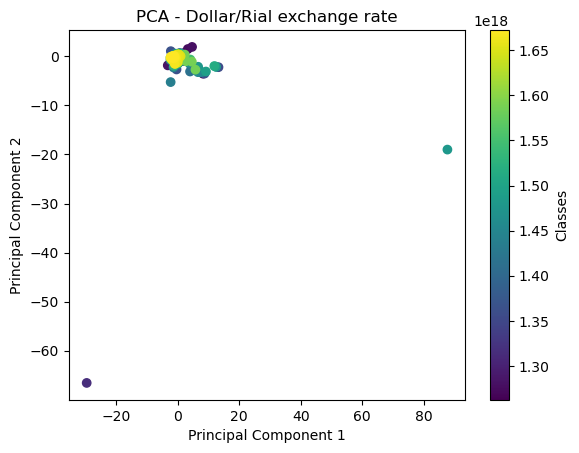

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_dollar_rial_data.values
y = scaled_dollar_rial_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dollar/Rial exchange rate')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     در اینجا مشاهده می‌کنیم که برخلاف نمودار نرخ تبدیل دلار یورو، توزیع واریانس خطی نبوده و نمی‌توان آن را به صورت تک بعدی تحلیل و بررسی کرد و باید از کامپوننت اصلی دوم نیز استفاده نمود.
</div>

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    نرخ تبدیل دلار/ یوان چینی:
</div>


In [24]:
import yfinance as yf
symbol = 'CNY=X'
start_date = '2010-01-01'
end_date = '2023-01-01'
dollar_yuan_data = yf.download(symbol, start=start_date, end=end_date)
dollar_yuan_data.to_csv('dollar_yuan.csv')
dollar_yuan_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8169,6.8169,6.8169,6.8169,6.8169,0
2010-01-05,6.8170,6.8170,6.8170,6.8170,6.8170,0
2010-01-06,6.8170,6.8183,6.8170,6.8183,6.8183,0
2010-01-07,6.8183,6.8183,6.8178,6.8178,6.8178,0
2010-01-08,6.8180,6.8180,6.8175,6.8175,6.8175,0
...,...,...,...,...,...,...
2022-12-26,6.9887,6.9893,6.9575,6.9887,6.9887,0
2022-12-27,6.9612,6.9673,6.9483,6.9612,6.9612,0
2022-12-28,6.9590,6.9777,6.9590,6.9590,6.9590,0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [25]:
import pandas as pd
dollar_yuan_data = pd.read_csv('dollar_yuan.csv')
dollar_yuan_data['Date'] = pd.to_datetime(dollar_yuan_data['Date'])
dollar_yuan_data.set_index('Date', inplace=True)

In [26]:
null_counts1 = dollar_yuan_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [27]:
dollar_yuan_data_bfill = dollar_yuan_data.bfill()
dollar_yuan_data_ffill = dollar_yuan_data_bfill.ffill()
dollar_yuan_data = dollar_yuan_data_ffill

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dollar_yuan_data)
scaled_dollar_yuan_data = scaler.transform(dollar_yuan_data)
scaled_dollar_yuan_data = pd.DataFrame(scaled_dollar_yuan_data,
columns = dollar_yuan_data.columns, index = dollar_yuan_data.index)

In [29]:
scaled_dollar_yuan_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.916911,0.882157,0.934750,0.916589,0.916589,0.0
2010-01-05,0.917248,0.882493,0.935081,0.916926,0.916926,0.0
2010-01-06,0.917248,0.886857,0.935081,0.921309,0.921309,0.0
2010-01-07,0.921626,0.886857,0.937721,0.919624,0.919624,0.0
2010-01-08,0.920616,0.885850,0.936732,0.918613,0.918613,0.0
...,...,...,...,...,...,...
2022-12-26,1.495537,1.460964,1.398784,1.495811,1.495811,0.0
2022-12-27,1.402918,1.387103,1.368420,1.403096,1.403096,0.0
2022-12-28,1.395508,1.422021,1.403735,1.395679,1.395679,0.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_dollar_yuan_data)

PCA(n_components=6)

In [31]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_dollar_yuan_data.columns)

In [32]:
loading

,P0,P1,P2,P3,P4,P5
Open,-0.448688,0.224953,-0.034103,0.864241,-1.945816e-15,0.0
High,-0.448324,0.233360,0.822439,-0.261044,-6.248665e-17,0.0
Low,-0.441517,-0.897107,0.015421,0.004894,-1.478872e-17,0.0
Close,-0.448747,0.212295,-0.401369,-0.304073,-7.071068e-01,0.0
Adj Close,-0.448747,0.212295,-0.401369,-0.304073,7.071068e-01,0.0
Volume,0.000000,0.000000,0.000000,-0.000000,0.000000e+00,1.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


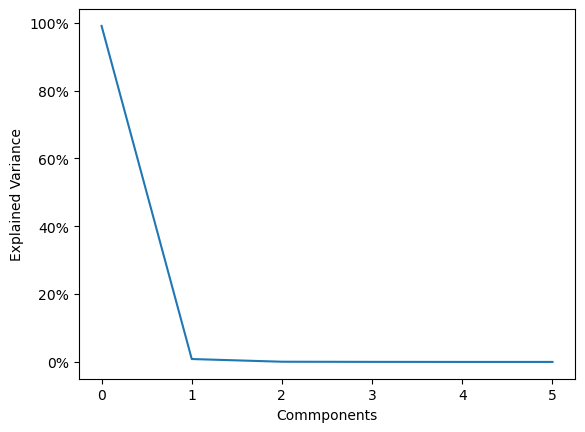

In [33]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     این نمودار مشابه نمودار مربوطه در نرخ تبدیل دلار یورو است. طبق این نمودار می‌توان مشاهده کرد که با اضافه شدن کامپوننت جدید بعد از کامپوننت شماره‌ی صفر اطلاعات جدیدی به دست نمی‌آید چرا که توزیع واریانس بعد از آن به صفر می‌رسد. 
</div>

[4.95514266e+00+0.j 4.26835248e-02+0.j 2.90513076e-03+0.j
 7.46659118e-04+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
[[-4.48688155e-01 -2.24953140e-01 -3.41034494e-02 -8.64240695e-01
   0.00000000e+00 -7.70032866e-18]
 [-4.48323841e-01 -2.33359572e-01  8.22438594e-01  2.61043681e-01
   0.00000000e+00 -3.91923284e-17]
 [-4.41517278e-01  8.97106862e-01  1.54214892e-02 -4.89372793e-03
   0.00000000e+00  1.30930715e-17]
 [-4.48746680e-01 -2.12295399e-01 -4.01368841e-01  3.04072581e-01
   0.00000000e+00 -7.07106781e-01]
 [-4.48746680e-01 -2.12295399e-01 -4.01368841e-01  3.04072581e-01
   0.00000000e+00  7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


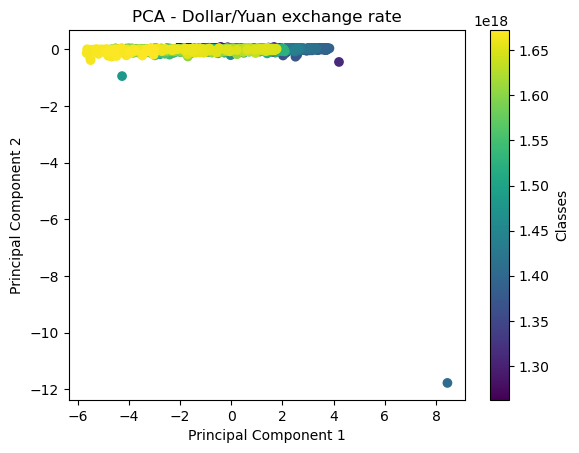

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_dollar_yuan_data.values
y = scaled_dollar_yuan_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dollar/Yuan exchange rate')
plt.colorbar(label='Classes')
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     براساس نمودار مشاهده می‌کنیم که مولفه‌ی اصلی اول بیشترین واریانس داده‌ها را در بر می‌گیرد، این درحالیست که با توجه به نمودار بالا می‌توان فهمید که مولفه‌ی دوم چنین نیست. پس داده‌ها به صورت خطی می‌توانند شبیه‌سازی شوند.
</div>

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    قیمت های بیتکوین:
</div>


In [35]:
import yfinance as yf
symbol = 'BTC-USD'
start_date = '2010-01-01'
end_date = '2023-01-01'
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data.to_csv('btc.csv')
btc_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [36]:
import pandas as pd
btc_data = pd.read_csv('btc.csv')
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

In [37]:
null_counts1 = btc_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [38]:
btc_data_bfill = btc_data.bfill()
btc_data_ffill = btc_data_bfill.ffill()
btc_data = btc_data_ffill

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dollar_rial_data)
scaled_btc_data = scaler.transform(btc_data)
scaled_btc_data = pd.DataFrame(scaled_btc_data,
columns = btc_data.columns, index = btc_data.index)

In [40]:
scaled_btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,2.948730e+04,3.407446e+04,2.921924e+04,5.112360e+04,5.112360e+04,2.105680e+07
2014-09-18,2.891276e+04,3.324435e+04,2.665873e+04,4.741613e+04,4.741613e+04,3.448320e+07
2014-09-19,2.682256e+04,3.111480e+04,2.479804e+04,4.407496e+04,4.407496e+04,3.791970e+07
2014-09-20,2.494466e+04,3.078177e+04,2.514651e+04,4.566507e+04,4.566507e+04,3.686360e+07
2014-09-21,2.580047e+04,2.998425e+04,2.536129e+04,4.452862e+04,4.452862e+04,2.658010e+07
...,...,...,...,...,...,...
2022-12-27,1.079369e+06,1.244062e+06,1.083537e+06,1.883766e+06,1.883766e+06,1.574858e+10
2022-12-28,1.066422e+06,1.229999e+06,1.074125e+06,1.865214e+06,1.865214e+06,1.700571e+10
2022-12-29,1.055953e+06,1.221458e+06,1.074850e+06,1.875331e+06,1.875331e+06,1.447224e+10


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_btc_data)

PCA(n_components=6)

In [42]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_btc_data.columns)

In [43]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.000037,-0.321655,7.333190e-01,-3.265019e-02,-5.980929e-01,-0.000000e+00
High,0.000044,-0.377573,3.799923e-01,5.522263e-01,6.388198e-01,-1.910942e-16
Low,0.000036,-0.322595,1.685358e-01,-8.286075e-01,4.253675e-01,-8.235989e-17
Close,0.000065,-0.570048,-3.804240e-01,6.078568e-02,-1.631818e-01,7.071068e-01
Adj Close,0.000065,-0.570048,-3.804240e-01,6.078568e-02,-1.631818e-01,-7.071068e-01
Volume,1.000000,0.000115,-3.000711e-07,-9.250754e-07,-1.987222e-08,-1.084575e-20


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


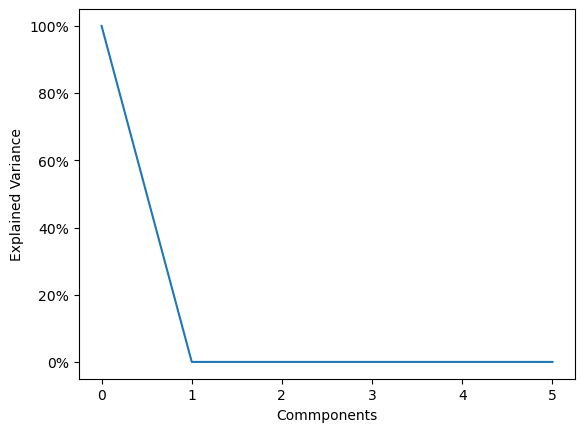

In [44]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

[3.99001199e+20+0.j 5.00198151e+12+0.j 2.79973843e+09+0.j
 1.01960864e+09+0.j 2.14887414e+08+0.j 3.98085099e-09+0.j]
[[-3.70659141e-05 -3.21655388e-01  7.33318953e-01  3.26501867e-02
  -5.98092876e-01  2.01360653e-16]
 [-4.39382247e-05 -3.77572802e-01  3.79992307e-01 -5.52226251e-01
   6.38819844e-01 -1.25911751e-16]
 [-3.62882620e-05 -3.22595426e-01  1.68535849e-01  8.28607468e-01
   4.25367514e-01 -1.27242814e-17]
 [-6.53128191e-05 -5.70047704e-01 -3.80423992e-01 -6.07856797e-02
  -1.63181796e-01 -7.07106781e-01]
 [-6.53128191e-05 -5.70047704e-01 -3.80423992e-01 -6.07856797e-02
  -1.63181796e-01  7.07106781e-01]
 [-9.99999993e-01  1.14681603e-04 -3.00071062e-07  9.25075411e-07
  -1.98722189e-08 -1.45659594e-20]]


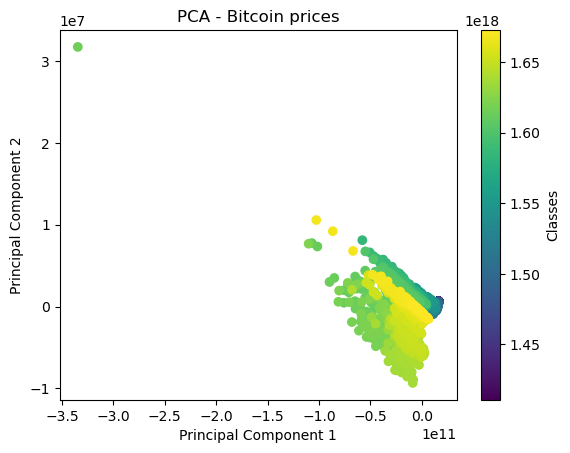

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_btc_data.values
y = scaled_btc_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Bitcoin prices')
plt.colorbar(label='Classes')
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     با توجه به نمودار مشاهده می‌کنیم که امکان کاهش بعد به یک بعد وجود ندارد چرا که توزیع آن خطی نیست و باید شامل مولفه‌ی دوم نیز شود.
</div>

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    نرخ بهره برداری آمریکا:
</div>


In [46]:
import yfinance as yf
symbol = '^IRX'
start_date = '2010-01-01'
end_date = '2023-01-01'
usa_exploitation_data = yf.download(symbol, start=start_date, end=end_date)
usa_exploitation_data.to_csv('usa_exploitation.csv')
usa_exploitation_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.080,0.080,0.055,0.055,0.055,0
2010-01-05,0.060,0.065,0.040,0.060,0.060,0
2010-01-06,0.060,0.060,0.045,0.045,0.045,0
2010-01-07,0.045,0.055,0.040,0.045,0.045,0
2010-01-08,0.045,0.045,0.035,0.040,0.040,0
...,...,...,...,...,...,...
2022-12-23,4.195,4.208,4.183,4.193,4.193,0
2022-12-27,4.198,4.223,4.153,4.195,4.195,0
2022-12-28,4.338,4.343,4.328,4.338,4.338,0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [47]:
import pandas as pd
usa_exploitation_data = pd.read_csv('usa_exploitation.csv')
usa_exploitation_data['Date'] = pd.to_datetime(usa_exploitation_data['Date'])
usa_exploitation_data.set_index('Date', inplace=True)

In [48]:
null_counts1 = usa_exploitation_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [49]:
usa_exploitation_data_bfill = usa_exploitation_data.bfill()
usa_exploitation_data_ffill = usa_exploitation_data_bfill.ffill()
usa_exploitation_data = usa_exploitation_data_ffill

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(usa_exploitation_data)
scaled_usa_exploitation_data = scaler.transform(usa_exploitation_data)
scaled_usa_exploitation_data = pd.DataFrame(scaled_usa_exploitation_data,
columns = usa_exploitation_data.columns, index = usa_exploitation_data.index)

In [51]:
scaled_usa_exploitation_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,-0.581819,-0.586588,-0.604066,-0.607841,-0.607841,0.0
2010-01-05,-0.603775,-0.602979,-0.620623,-0.602350,-0.602350,0.0
2010-01-06,-0.603775,-0.608442,-0.615104,-0.618823,-0.618823,0.0
2010-01-07,-0.620243,-0.613906,-0.620623,-0.618823,-0.618823,0.0
2010-01-08,-0.620243,-0.624833,-0.626142,-0.624314,-0.624314,0.0
...,...,...,...,...,...,...
2022-12-23,3.935757,3.924205,3.952385,3.936560,3.936560,0.0
2022-12-27,3.939050,3.940596,3.919271,3.938757,3.938757,0.0
2022-12-28,4.092746,4.071723,4.112435,4.095801,4.095801,0.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_usa_exploitation_data)

PCA(n_components=6)

In [53]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_usa_exploitation_data.columns)

In [54]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.447339,-0.187797,-0.657303,0.576691,0.000000e+00,0.0
High,0.446727,0.892267,-0.007975,-0.065052,0.000000e+00,0.0
Low,0.447305,-0.284312,-0.307649,-0.790213,1.875707e-15,0.0
Close,0.447348,-0.209475,0.486437,0.139210,-7.071068e-01,0.0
Adj Close,0.447348,-0.209475,0.486437,0.139210,7.071068e-01,0.0
Volume,0.000000,-0.000000,0.000000,-0.000000,0.000000e+00,1.0


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


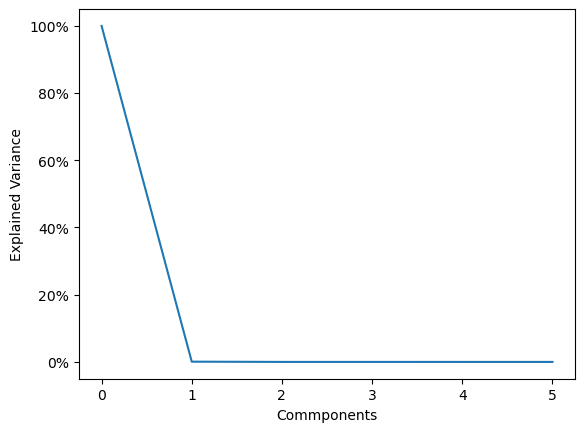

In [55]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

[4.99748534e+00+0.j 3.74792898e-03+0.j 1.69153817e-04+0.j
 1.27561256e-04+0.j 1.11020026e-16+0.j 0.00000000e+00+0.j]
[[-4.47339139e-01  1.87797056e-01 -6.57302880e-01  5.76691326e-01
   1.96294162e-13  0.00000000e+00]
 [-4.46726630e-01 -8.92266724e-01 -7.97487397e-03 -6.50523908e-02
   2.24762990e-14  0.00000000e+00]
 [-4.47305380e-01  2.84311772e-01 -3.07649422e-01 -7.90212975e-01
   2.71099183e-13  0.00000000e+00]
 [-4.47348248e-01  2.09474552e-01  4.86436614e-01  1.39209833e-01
  -7.07106781e-01  0.00000000e+00]
 [-4.47348248e-01  2.09474552e-01  4.86436614e-01  1.39209833e-01
   7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


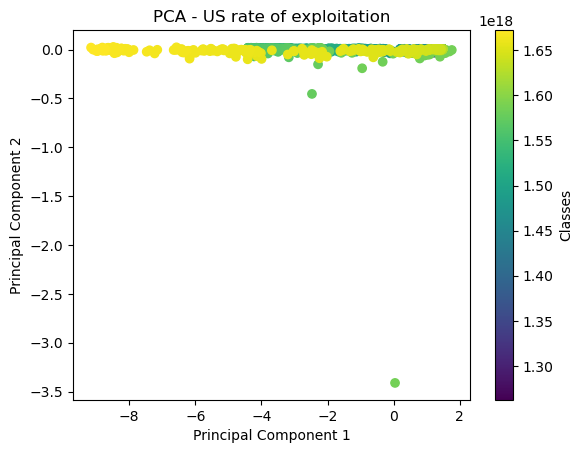

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_usa_exploitation_data.values
y = scaled_usa_exploitation_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - US rate of exploitation')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    طلا:
</div>


In [57]:
import yfinance as yf
symbol = 'GC=F'
start_date = '2010-01-01'
end_date = '2023-01-01'
gold_data = yf.download(symbol, start=start_date, end=end_date)
gold_data.to_csv('gold.csv')
gold_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54
...,...,...,...,...,...,...
2022-12-23,1794.300049,1802.800049,1794.099976,1795.900024,1795.900024,49
2022-12-27,1803.400024,1826.300049,1803.400024,1814.800049,1814.800049,69
2022-12-28,1803.199951,1807.900024,1803.099976,1807.900024,1807.900024,434


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [58]:
import pandas as pd
gold_data = pd.read_csv('gold.csv')
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

In [59]:
null_counts1 = gold_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [60]:
gold_data_bfill = gold_data.bfill()
gold_data_ffill = gold_data_bfill.ffill()
gold_data = gold_data_ffill

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(gold_data)
scaled_gold_data = scaler.transform(gold_data)
scaled_gold_data = pd.DataFrame(scaled_gold_data,
columns = gold_data.columns, index = gold_data.index)

In [62]:
scaled_gold_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,-1.332981,-1.333929,-1.394688,-1.332473,-1.332473,-0.180448
2010-01-05,-1.331374,-1.317184,-1.322243,-1.330866,-1.330866,-0.184884
2010-01-06,-1.259871,-1.266548,-1.299175,-1.259364,-1.259364,-0.174386
2010-01-07,-1.271119,-1.290869,-1.264774,-1.270612,-1.270612,-0.184782
2010-01-08,-1.250632,-1.270535,-1.291080,-1.250125,-1.250125,-0.184850
...,...,...,...,...,...,...
2022-12-23,1.384934,1.379289,1.426192,1.391823,1.391823,-0.185020
2022-12-27,1.421489,1.472985,1.463831,1.467744,1.467744,-0.184342
2022-12-28,1.420685,1.399623,1.462617,1.440027,1.440027,-0.171982


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_gold_data)

PCA(n_components=6)

In [64]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_gold_data.columns)

In [65]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.447085,0.005429,0.706871,-0.209625,0.506436,0.000000e+00
High,0.447184,0.002706,0.303818,0.629171,-0.558442,1.664269e-16
Low,0.447179,0.007688,-0.124334,-0.718074,-0.518539,2.766531e-17
Close,0.447239,0.004699,-0.443040,0.149263,0.285292,-7.071068e-01
Adj Close,0.447239,0.004699,-0.443040,0.149263,0.285292,7.071068e-01
Volume,-0.011279,0.999930,0.000460,0.003553,0.000068,-1.411772e-17


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


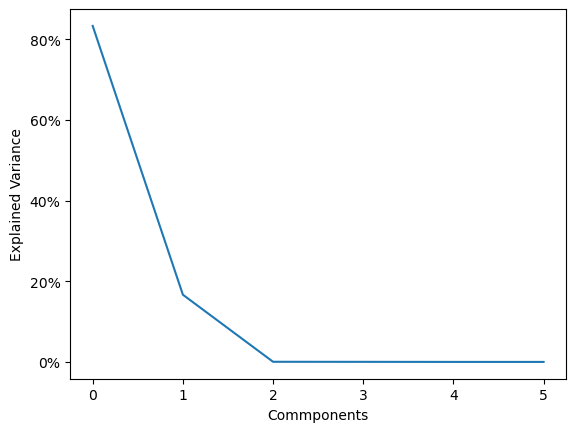

In [66]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
      در اینجا حدود ۸۰ درصد از توزیع واریانس به کامپوننت شماره صفر و ۲۰ درصد به شماره‌ی یک است و با اضافه شدن کامپوننت جدید به نمودار توزیع واریانسی شامل آن نمی‌باشد.
</div>

[4.99864374e+00+0.j 9.99810076e-01+0.j 2.05508931e-03+0.j
 1.14879020e-03+0.j 1.78293069e-04+0.j 2.35866609e-20+0.j]
[[-4.47084905e-01  5.42855800e-03  7.06870583e-01  2.09624586e-01
  -5.06435711e-01  4.03927409e-15]
 [-4.47184489e-01  2.70641610e-03  3.03818500e-01 -6.29170801e-01
   5.58441698e-01 -5.11440365e-15]
 [-4.47179170e-01  7.68833472e-03 -1.24334112e-01  7.18073901e-01
   5.18538890e-01 -4.20133080e-15]
 [-4.47238575e-01  4.69907182e-03 -4.43040131e-01 -1.49262992e-01
  -2.85292092e-01 -7.07106781e-01]
 [-4.47238575e-01  4.69907182e-03 -4.43040131e-01 -1.49262992e-01
  -2.85292092e-01  7.07106781e-01]
 [ 1.12793591e-02  9.99929964e-01  4.60162039e-04 -3.55340758e-03
  -6.76492069e-05 -1.58912889e-17]]


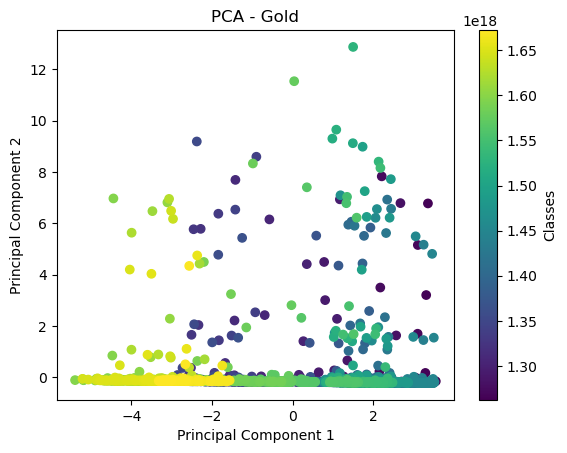

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_gold_data.values
y = scaled_gold_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Gold')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     در این نمودار مشاهده می‌کنیم که امکان تحلیل نمودار به صورت یک بعد وجود ندارد. زیرا با یک بعد اطلاعات قابل توجهی ممکن است از دست برود.
</div>

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    فلز (نقره):
</div>


In [68]:
import yfinance as yf
symbol = 'SI=F '
start_date = '2010-01-01'
end_date = '2023-01-01'
silver_data = yf.download(symbol, start=start_date, end=end_date)
silver_data.to_csv('silver.csv')
silver_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.440001,17.440001,16.870001,17.440001,17.440001,28
2010-01-05,17.781000,17.820000,17.575001,17.781000,17.781000,38
2010-01-06,18.163000,18.190001,17.840000,18.163000,18.163000,19
2010-01-07,18.333000,18.333000,18.090000,18.333000,18.333000,7
2010-01-08,18.458000,18.458000,18.120001,18.458000,18.458000,3
...,...,...,...,...,...,...
2022-12-23,23.715000,23.879999,23.610001,23.764000,23.764000,31
2022-12-27,24.115000,24.139999,24.040001,24.040001,24.040001,133
2022-12-28,24.075001,24.094999,23.584999,23.663000,23.663000,372


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [69]:
import pandas as pd
silver_data = pd.read_csv('silver.csv')
silver_data['Date'] = pd.to_datetime(silver_data['Date'])
silver_data.set_index('Date', inplace=True)

In [70]:
null_counts1 = silver_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [71]:
silver_data_bfill = silver_data.bfill()
silver_data_ffill = silver_data_bfill.ffill()
silver_data = silver_data_ffill

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(silver_data)
scaled_silver_data = scaler.transform(silver_data)
scaled_silver_data = pd.DataFrame(scaled_silver_data,
columns = silver_data.columns, index = silver_data.index)

In [73]:
scaled_silver_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,-0.618340,-0.631710,-0.692750,-0.617267,-0.617267,-0.177294
2010-01-05,-0.565642,-0.573908,-0.581783,-0.564512,-0.564512,-0.176352
2010-01-06,-0.506608,-0.517626,-0.540071,-0.505414,-0.505414,-0.178141
2010-01-07,-0.480336,-0.495875,-0.500721,-0.479114,-0.479114,-0.179271
2010-01-08,-0.461018,-0.476861,-0.495999,-0.459776,-0.459776,-0.179648
...,...,...,...,...,...,...
2022-12-23,0.351401,0.347885,0.368134,0.361099,0.361099,-0.177011
2022-12-27,0.413217,0.387434,0.435816,0.403798,0.403798,-0.167404
2022-12-28,0.407035,0.380589,0.364199,0.345473,0.345473,-0.144895


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_silver_data)

PCA(n_components=6)

In [75]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_silver_data.columns)

In [76]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.447096,-0.004443,0.632946,-0.330670,0.538630,0.000000e+00
High,0.447173,-0.005151,0.451027,0.471562,-0.611731,1.252167e-16
Low,0.447158,-0.003040,-0.306664,-0.711193,-0.447440,-1.764539e-16
Close,0.447270,-0.004303,-0.388530,0.285035,0.260251,7.071068e-01
Adj Close,0.447270,-0.004303,-0.388530,0.285035,0.260251,-7.071068e-01
Volume,0.009499,0.999954,0.000859,0.001251,0.000122,-3.368222e-17


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


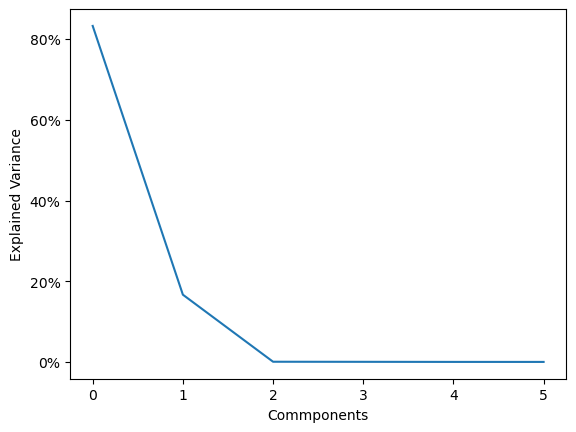

In [77]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
      در اینجا حدود ۸۰ درصد از توزیع واریانس به کامپوننت شماره صفر و ۲۰ درصد به شماره‌ی یک است و با اضافه شدن کامپوننت جدید به نمودار توزیع واریانسی شامل آن نمی‌باشد.
</div>

[4.99742124e+00+0.j 9.99947620e-01+0.j 2.72910799e-03+0.j
 1.49891681e-03+0.j 2.39104098e-04+0.j 4.38693759e-20+0.j]
[[-4.47096217e-01  4.44328075e-03 -6.32945853e-01  3.30669810e-01
   5.38629978e-01 -1.32817394e-14]
 [-4.47172711e-01  5.15069717e-03 -4.51026850e-01 -4.71561627e-01
  -6.11730701e-01  1.73829615e-14]
 [-4.47157626e-01  3.03988582e-03  3.06663823e-01  7.11193165e-01
  -4.47439826e-01  1.16461387e-14]
 [-4.47270258e-01  4.30316966e-03  3.88529850e-01 -2.85034933e-01
   2.60250729e-01  7.07106781e-01]
 [-4.47270258e-01  4.30316966e-03  3.88529850e-01 -2.85034933e-01
   2.60250729e-01 -7.07106781e-01]
 [-9.49893253e-03 -9.99953725e-01 -8.59455878e-04 -1.25083156e-03
   1.22090368e-04  1.36787479e-17]]


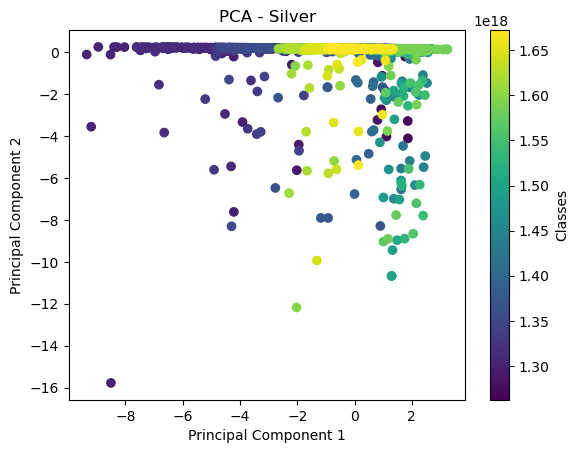

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_silver_data.values
y = scaled_silver_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Silver')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     در این نمودار مشاهده می‌کنیم که امکان تحلیل نمودار به صورت یک بعد وجود ندارد. زیرا با یک بعد اطلاعات قابل توجهی ممکن است از دست برود.
</div>

<div style="direction:rtl; text-align:right; font-size: 20px; color:blue">
    گندم:
</div>


In [79]:
import yfinance as yf
symbol = 'W'
start_date = '2010-01-01'
end_date = '2023-01-01'
wheat_data = yf.download(symbol, start=start_date, end=end_date)
wheat_data.to_csv('wheat.csv')
wheat_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-02,36.000000,39.430000,34.490002,37.720001,37.720001,16000600
2014-10-03,36.250000,36.799999,31.200001,32.180000,32.180000,4069700
2014-10-06,32.330002,33.290001,32.000000,32.799999,32.799999,802900
2014-10-07,33.000000,34.549999,32.689999,32.820000,32.820000,937500
2014-10-08,32.820000,32.950001,30.650000,31.049999,31.049999,1020200
...,...,...,...,...,...,...
2022-12-23,33.840000,34.180000,32.740002,33.560001,33.560001,2165600
2022-12-27,33.029999,33.779999,32.080002,32.150002,32.150002,2215400
2022-12-28,31.680000,32.400002,30.670000,31.389999,31.389999,2796000


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    آماده سازی داده برای PCA
</div>

In [80]:
import pandas as pd
wheat_data = pd.read_csv('wheat.csv')
wheat_data['Date'] = pd.to_datetime(wheat_data['Date'])
wheat_data.set_index('Date', inplace=True)

In [81]:
null_counts1 = wheat_data.isnull().sum()
print(null_counts1)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [82]:
wheat_data_bfill = wheat_data.bfill()
wheat_data_ffill = wheat_data_bfill.ffill()
wheat_data = wheat_data_ffill

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wheat_data)
scaled_wheat_data = scaler.transform(wheat_data)
scaled_wheat_data = pd.DataFrame(scaled_wheat_data,
columns = wheat_data.columns, index = wheat_data.index)

In [84]:
scaled_wheat_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-02,-0.841078,-0.815098,-0.847009,-0.823027,-0.823027,8.323521
2014-10-03,-0.838274,-0.843858,-0.884880,-0.885231,-0.885231,1.258952
2014-10-06,-0.882252,-0.882240,-0.875671,-0.878270,-0.878270,-0.675398
2014-10-07,-0.874735,-0.868462,-0.867729,-0.878045,-0.878045,-0.595698
2014-10-08,-0.876754,-0.885958,-0.891211,-0.897919,-0.897919,-0.546730
...,...,...,...,...,...,...
2022-12-23,-0.865311,-0.872508,-0.867153,-0.869736,-0.869736,0.131489
2022-12-27,-0.874398,-0.876882,-0.874751,-0.885568,-0.885568,0.160977
2022-12-28,-0.889544,-0.891972,-0.890981,-0.894102,-0.894102,0.504764


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    استفاده از PCA:
</div>

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(scaled_wheat_data)

PCA(n_components=6)

In [86]:
loading = pd.DataFrame(pca.components_.T, 
columns = ['P0','P1','P2','P3','P4','P5'], 
index = scaled_wheat_data.columns)

In [87]:
loading

,P0,P1,P2,P3,P4,P5
Open,0.447088,-0.004796,-0.727631,-0.040422,-0.518660,0.000000e+00
High,0.447233,0.008749,-0.084504,0.771867,0.443832,-1.957204e-15
Low,0.447226,-0.013159,-0.132409,-0.630277,0.620511,1.902707e-15
Close,0.447246,-0.001217,0.472159,-0.050505,-0.272919,7.071068e-01
Adj Close,0.447246,-0.001217,0.472159,-0.050505,-0.272919,-7.071068e-01
Volume,0.005206,0.999862,-0.003344,-0.015366,0.001130,7.056270e-17


<div style="direction:rtl; text-align:right; font-size: 20px; color:green">
    توضیح توزیع واریانس:
</div>

/var/folders/pt/c726l06s5nn5k679f3wtgkh00000gn/T/ipykernel_4708/250987796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])


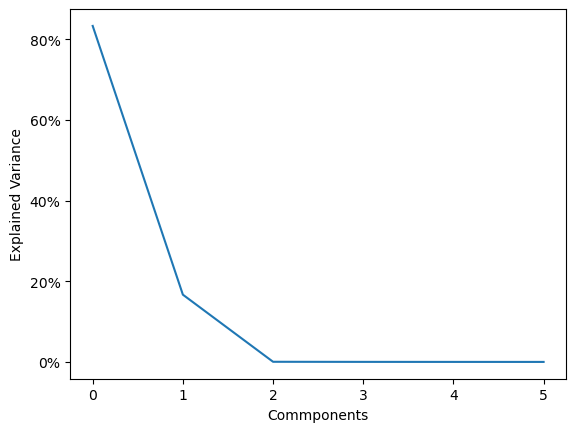

In [88]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Commponents')
plt.ylabel('Explained Variance')
plt.gca().set_yticklabels([str(int(y*100)) + '%' for y in plt.gca().get_yticks()])
plt.show()

[ 4.99927697e+00+0.j  1.00062189e+00+0.j  2.07218085e-03+0.j
  6.72443041e-04+0.j  2.46687803e-04+0.j -9.79816606e-21+0.j]
[[-4.47088053e-01  4.79577359e-03 -7.27631159e-01  4.04217283e-02
  -5.18660056e-01  3.08400897e-15]
 [-4.47232757e-01 -8.74944226e-03 -8.45036500e-02 -7.71867160e-01
   4.43831646e-01 -5.25993363e-15]
 [-4.47225805e-01  1.31588984e-02 -1.32409161e-01  6.30277424e-01
   6.20511164e-01 -2.22202753e-15]
 [-4.47245523e-01  1.21716121e-03  4.72159223e-01  5.05045731e-02
  -2.72919249e-01  7.07106781e-01]
 [-4.47245523e-01  1.21716121e-03  4.72159223e-01  5.05045731e-02
  -2.72919249e-01 -7.07106781e-01]
 [-5.20555217e-03 -9.99862155e-01 -3.34362630e-03  1.53660797e-02
   1.13037015e-03  5.48769168e-17]]


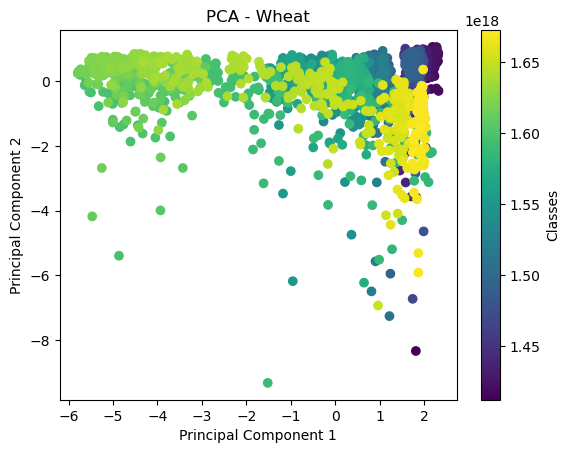

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = scaled_wheat_data.values
y = scaled_wheat_data.index
x_centered = x - np.mean(x, axis = 0)
covariance_matrix = np.cov(x_centered.T)
eigenvalues, eigenvectors = linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
print(eigenvalues_sorted)
print(eigenvectors_sorted)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]
x_transformed = np.dot(x_centered, selected_eigenvectors)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Wheat')
plt.colorbar(label='Classes')
plt.show()


<div style="direction:rtl; text-align:right; font-size: 15px; color:blue">
     تحلیل لازم برای این دو نمودار مشابه تحلیل‌های ارائه شده برای نمودارهای قبلی است.
</div>